In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./de_time_results.csv').dropna(axis=1)
df['total_sw_resources'] = df['sw_count'] * (df['sw_mem'] + df['sw_cpu'])
df['is_vertical_test'] = (df['sw_cpu'] > 1) | (df['total_sw_resources'] == 2)
df

,run_number,run_group,d_cpu,d_mem,h_cpu,h_mem,sm_cpu,sm_mem,sw_cpu,sw_mem,sw_count,result_seconds,total_sw_resources,is_vertical_test
0,1,1,1,1,1,1,1,1,1,1,1,2262.216422,2,True
1,2,1,1,1,1,1,1,1,1,1,1,2265.649212,2,True
2,3,2,1,1,1,1,1,1,1,1,3,901.716701,6,False
3,4,2,1,1,1,1,1,1,1,1,3,898.505167,6,False
4,5,3,1,1,1,1,1,1,1,1,6,481.160243,12,False
5,6,3,1,1,1,1,1,1,1,1,6,458.324928,12,False
6,7,4,1,1,1,1,1,1,1,1,9,413.550420,18,False
7,8,4,1,1,1,1,1,1,1,1,9,282.799356,18,False
8,9,4,1,1,1,1,1,1,1,1,9,287.096921,18,False
9,10,5,1,1,1,1,1,1,1,1,15,198.699087,30,False


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   run_number          15 non-null     int64  
 1   run_group           15 non-null     int64  
 2   d_cpu               15 non-null     int64  
 3   d_mem               15 non-null     int64  
 4   h_cpu               15 non-null     int64  
 5   h_mem               15 non-null     int64  
 6   sm_cpu              15 non-null     int64  
 7   sm_mem              15 non-null     int64  
 8   sw_cpu              15 non-null     int64  
 9   sw_mem              15 non-null     int64  
 10  sw_count            15 non-null     int64  
 11  result_seconds      15 non-null     float64
 12  total_sw_resources  15 non-null     int64  
 13  is_vertical_test    15 non-null     bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 1.7 KB


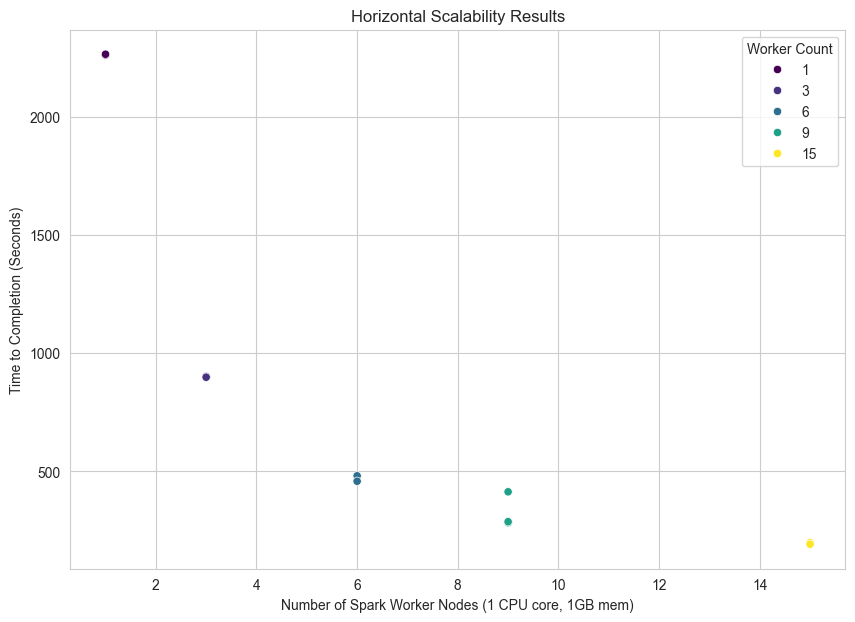

In [88]:
# sns.set_style("whitegrid")
# plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(10,7))
sns.scatterplot(data=df[df['sw_cpu']==1], x='sw_count', y='result_seconds', hue='sw_count', palette='viridis')
plt.title("Horizontal Scalability Results")
plt.xlabel("Number of Spark Worker Nodes (1 CPU core, 1GB mem)")
plt.ylabel("Time to Completion (Seconds)")
plt.legend(title="Worker Count")

In [89]:
avg_df = df.groupby(["total_sw_resources", 'is_vertical_test', "sw_count"])['result_seconds'].mean().reset_index()
duplicated_row = df.iloc[0]
duplicated_row['is_vertical_test'] = False
avg_df = pd.concat([avg_df, pd.DataFrame([duplicated_row])], ignore_index=True)
avg_df

C:\Users\krasky\AppData\Local\Temp\ipykernel_25300\3638397878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_row['is_vertical_test'] = False


,total_sw_resources,is_vertical_test,sw_count,result_seconds,run_number,run_group,d_cpu,d_mem,h_cpu,h_mem,sm_cpu,sm_mem,sw_cpu,sw_mem
0,2,True,1,2263.932817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,False,3,900.110934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,True,1,597.652032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,False,6,469.742585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16,True,1,313.776312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,18,False,9,327.815566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,24,True,1,207.007612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30,False,15,195.201385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30,True,1,156.503711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,False,1,2262.216422,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


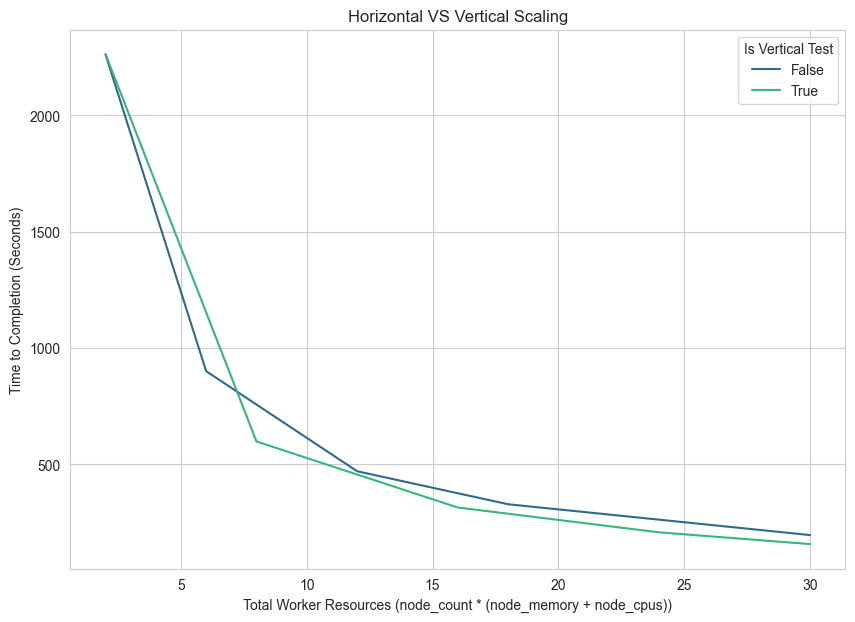

In [90]:
plt.figure(figsize=(10,7))
sns.lineplot(data=avg_df, x='total_sw_resources', y='result_seconds', hue="is_vertical_test", palette='viridis')
plt.title("Horizontal VS Vertical Scaling")
plt.ylabel("Time to Completion (Seconds)")
plt.xlabel("Total Worker Resources (node_count * (node_memory + node_cpus))")
plt.legend(title="Is Vertical Test")